In [1]:
import pandas as pd

# 文件路径
file_path = r"c:\Users\30355\Desktop\SARIMA\data_SARIMA.xlsx"

# 从Excel文件读取数据
df = pd.read_excel(file_path)

# 假设DataFrame有一个名为'monthly'的列和一个名为'total'的列
# 确保'monthly'列为datetime类型，并格式化为'年-月'格式
df['monthly'] = pd.to_datetime(df['monthly']).dt.strftime('%Y-%m')

# 分组并求和
# df_total = df.groupby('monthly')['total'].sum()

# 打印结果
print(df)


    monthly  total
0   2022-01   7603
1   2022-02   7816
2   2022-03   8065
3   2022-04   8314
4   2022-05   8543
5   2022-06   8645
6   2022-07   8834
7   2022-08   9195
8   2022-09   9523
9   2022-10   9903
10  2022-11  10052
11  2022-12   9754
12  2023-01   9915
13  2023-02   9981
14  2023-03  10118
15  2023-04  10234
16  2023-05  10403
17  2023-06  10456
18  2023-07  10510
19  2023-08  10577
20  2023-09  10595
21  2023-10  10878
22  2023-11  10964
23  2023-12  10875
24  2024-01  11053
25  2024-02  10847
26  2024-03  10895
27  2024-04  10955
28  2024-05  11121
29  2024-06  11153
30  2024-07  11211
31  2024-08  11235
32  2024-09  11074
33  2024-10  11171
34  2024-11  11188
35  2024-12  11084


In [2]:
## 檢驗平穩性
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 假设df是您的DataFrame，且包含时间序列数据
# df['your_time_series'] 是您想要检验的时间序列列

# ADF检验
result = adfuller(df['total'])

# 打印测试结果
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# 解读结果
if result[0] < result[4]["5%"]:
    print("数据是平稳的")
else:
    print("数据不是平稳的")

ADF Statistic: -4.196556
p-value: 0.000668
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
数据是平稳的


In [3]:
# df['seasonal_difference'] = df['total'].diff(1)
# result = adfuller(df['seasonal_difference'].dropna())  # Drop NaN values before testing


# #測試數據是否平穩
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))

# # 解读结果
# if result[0] < result[4]["5%"]:
#     print("数据是平稳的")
# else:
#     print("数据不是平稳的")

In [4]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
import datetime as dt
filterwarnings('ignore')

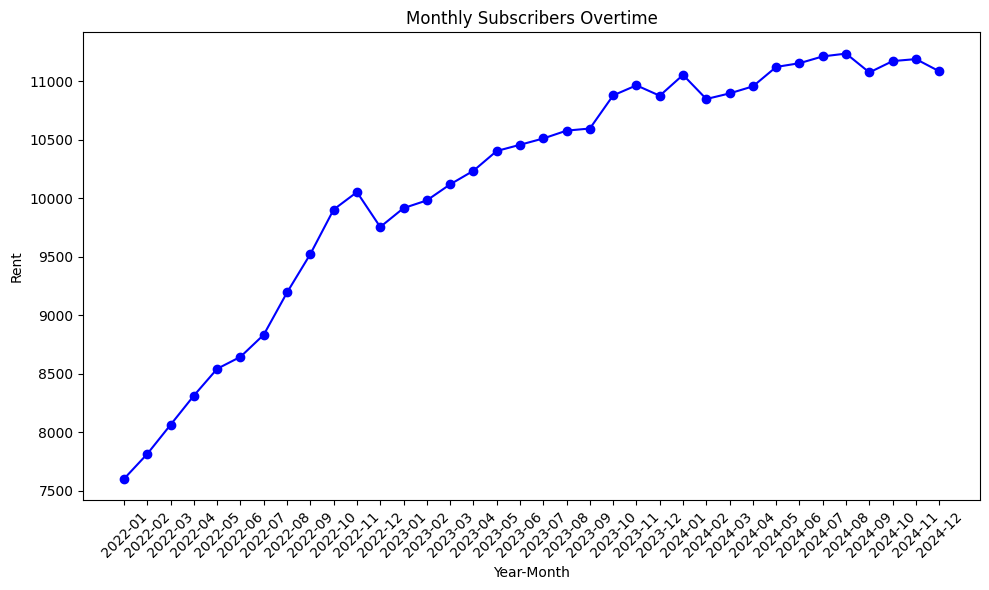

In [5]:
from matplotlib import pyplot as plt 
# Plot a line plot using the time series dataset
plt.figure(figsize=(10, 6))  # Set the figure size 
plt.plot(df['monthly'], df['total'], marker='o', linestyle='-', color='b')  # Plot with markers and a line

plt.title('Monthly Subscribers Overtime')  
plt.xlabel('Year-Month')  
plt.ylabel('Rent')  
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()  

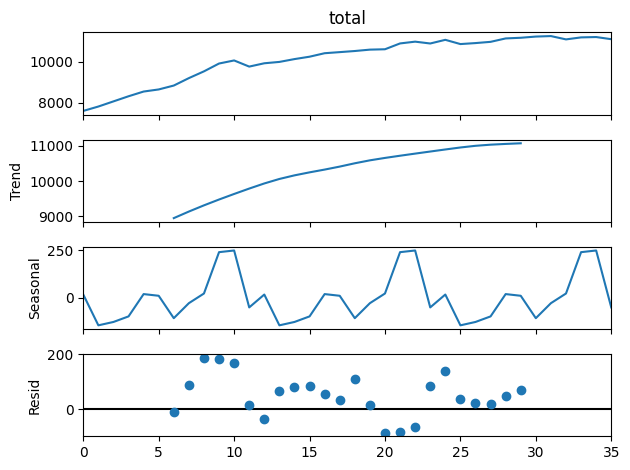

In [6]:
# For seasonality detection
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose( df['total'], model='additive', period=12)  # period may vary based on data frequency

# Plot the decomposed components
decomposition.plot()
plt.show()

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def split_time_series(df, methods='simple', validation_periods=12):
    """
    Split time series data using different methods
    
    Parameters:
    df: DataFrame with datetime index
    methods: str, one of 'simple', 'expanding', 'rolling'
    validation_periods: int, number of periods for validation
    """
    
    if methods == 'simple':
        # Simple split (last n periods for validation)
        train = df[:-validation_periods]
        validation = df[-validation_periods:]
        return train, validation
    
    elif methods == 'expanding':
        # Expanding window split (multiple validation sets)
        splits = []
        for i in range(validation_periods):
            split_point = len(df) - validation_periods + i
            train = df[:split_point]
            val = df[split_point:split_point+1]
            splits.append((train, val))
        return splits
    
    elif methods == 'rolling':
        # Rolling window split
        window_size = validation_periods * 2  # Training window size
        splits = []
        for i in range(validation_periods):
            split_point = len(df) - validation_periods + i
            train = df[split_point - window_size:split_point]
            val = df[split_point:split_point+1]
            splits.append((train, val))
        return splits

# Example usage
if __name__ == "__main__":
    # Create sample data
    
    # 1. Simple split (last 12 periods for validation)
    train, validation = split_time_series(df, 'simple', 12)
    print("\nSimple Split:")
    print(f"Training set size: {len(train)}")
    print(f"Validation set size: {len(validation)}")
    
    # 2. Expanding window split
    splits = split_time_series(df, 'expanding', 12)
    print("\nExpanding Window Split:")
    print(f"Number of splits: {len(splits)}")
    print(f"First split - Training size: {len(splits[0][0])}, Validation size: {len(splits[0][1])}")
    
    # 3. Rolling window split
    splits = split_time_series(df, 'rolling', 12)
    print("\nRolling Window Split:")
    print(f"Number of splits: {len(splits)}")
    print(f"First split - Training size: {len(splits[0][0])}, Validation size: {len(splits[0][1])}")


Simple Split:
Training set size: 24
Validation set size: 12

Expanding Window Split:
Number of splits: 12
First split - Training size: 24, Validation size: 1

Rolling Window Split:
Number of splits: 12
First split - Training size: 24, Validation size: 1


In [8]:
# Print column names
print("Available columns:", train.columns.tolist())

# Print first few rows of your data
print("\nFirst few rows of your data:")
print(train.head())

Available columns: ['monthly', 'total']

First few rows of your data:
   monthly  total
0  2022-01   7603
1  2022-02   7816
2  2022-03   8065
3  2022-04   8314
4  2022-05   8543


In [9]:
# 測試 SARIMA 參數組合
import itertools 
# train = df[:-12]
# validation = df[-12:]

# Find the best p,d,q combination gives lowest AIC
p = d = q = range(0, 2)  # ranges for ARIMA parameters, 0 - 2
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # 12 for 12 months

best_aic = float("inf")
best_params = None
best_seasonal_params = None

for param in itertools.product(p, d, q):
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train['total'],
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(maxiter=200, disp=0)  # Set disp=0 to reduce output verbosity
        except Exception as e:
            print(f"SARIMA{param}x{seasonal_param} - AIC: None - Exception: {e}")
            continue  # Continue to the next iteration

        # Check if the current model AIC is lower than what we've seen before
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
            best_seasonal_params = seasonal_param

# Print out the best parameters and AIC
if best_params is not None:
    print(f"Best SARIMA parameters: {best_params}")
    print(f"Best Seasonal parameters: {best_seasonal_params}")
    print(f"Best AIC: {best_aic}")
else:
    print("No suitable model was found.")

Best SARIMA parameters: (0, 0, 0)
Best Seasonal parameters: (0, 1, 1, 12)
Best AIC: 4.0


In [10]:
# Fit the model with the best parameters
best_model = SARIMAX(train['total'],
                     order=best_params,
                     seasonal_order=best_seasonal_params,
                     enforce_stationarity=False,
                     enforce_invertibility=False)
best_model_fit = best_model.fit()

# Summarize the final model
print(best_model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:                      total   No. Observations:                   24
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                   0.000
Date:                    Wed, 08 Jan 2025   AIC                              4.000
Time:                            09:26:25   BIC                                nan
Sample:                                 0   HQIC                               nan
                                     - 24                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
sigma2      2.055e+05         -0       -inf      0.000    2.05e+05    2.05e+05
Ljung-Box (L1) (Q): 

In [11]:
# # 看一下結果的dataframe
# print(df)

In [12]:
# # Generate forecasts for the validation period 
# forecast_result = best_model_fit.get_forecast(steps=12)

# # Get the forecast values
# forecasted_values = forecast_result.predicted_mean

# # Get the confidence intervals of the forecasts
# conf_int = forecast_result.conf_int(alpha=0.05)

# # Combine results into a DataFrame
# future_dates = pd.date_range(start='2024-12-01', periods=12, freq='M')
# forecast_df = pd.DataFrame({
#     'Date': future_dates.strftime('%Y-%m'),  # 格式化日期，仅显示年和月
#     'Forecast': forecasted_values,
#     'Lower Bound': conf_int.iloc[:, 0],
#     'Upper Bound': conf_int.iloc[:, 1]
# })

# print(forecast_df)

# # 可以选择将结果导出到Excel
# forecast_df.to_excel('forecast_results.xlsx', index=False)

In [19]:
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# 假设df是您的DataFrame，'Date'列已经是datetime类型
# 按月聚合数据
df['Date'] = pd.to_datetime(df['monthly'])
df.set_index('Date', inplace=True)

# 使用SARIMAX模型对原始数据进行建模和预测
# SARIMA(p,d,q)(P,D,Q)m
model = SARIMAX(df['total'], order=(1,0,1), seasonal_order=(1, 0, 1, 12)) #這是 Best SARIMA parameters output的組合
results = model.fit()

# 预测未来8个月的人数
forecast = results.get_forecast(steps=12)
forecasted_values = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

# 创建结果DataFrame
future_dates = pd.date_range(start='2025-01-01', periods=12, freq='M')
results_df = pd.DataFrame({
    'Date': future_dates.strftime('%Y-%m'),  # 格式化日期，仅显示年和月
    'Forecast': forecasted_values,
    'Lower Bound': conf_int.iloc[:, 0],
    'Upper Bound': conf_int.iloc[:, 1]
})

# 打印预测结果
print(results_df)

# 可以选择将结果导出到Excel
results_df.to_excel('forecast_results_2.xlsx', index=False)

               Date      Forecast   Lower Bound   Upper Bound
2025-01-01  2025-01  11151.686154  10965.801042  11337.571265
2025-02-01  2025-02  10883.228037  10553.335661  11213.120412
2025-03-01  2025-03  10904.433861  10477.098725  11331.768997
2025-04-01  2025-04  10958.493845  10452.613119  11464.374572
2025-05-01  2025-05  11103.939742  10530.588235  11677.291249
2025-06-01  2025-06  11127.208854  10493.909383  11760.508325
2025-07-01  2025-07  11210.521963  10522.825025  11898.218900
2025-08-01  2025-08  11290.636802  10552.862134  12028.411471
2025-09-01  2025-09  11155.564704  10371.202356  11939.927051
2025-10-01  2025-10  11163.667256  10335.616250  11991.718262
2025-11-01  2025-11  11154.837325  10285.557811  12024.116840
2025-12-01  2025-12  10991.445450  10083.060966  11899.829934


In [18]:
import pandas as pd
import plotly.graph_objects as go

# 假設df已正確載入並處理，以下程式碼基於您提供的預測結果results_df和原始資料df_total
# 注意確保results_df已經包含了Date、Forecast、Lower Bound和Upper Bound列

# 格式化日期列為datetime，如果還未設定
df['monthly'] = pd.to_datetime(df['monthly'])



df_total = df.groupby('monthly')['total'].sum()

# 轉換索引為日期格式，以便與預測資料對齊
df_total.index = pd.to_datetime(df_total.index)

# 建立圖表
fig = go.Figure()

# 新增原始資料線
fig.add_trace(go.Scatter(
     x=df_total.index,
     y=df_total,
     mode='lines+markers',
     name='實際每月總訂閱人數',
     line=dict(color='blue'),
     hoverinfo='x+y'
))

# 新增預測資料線
fig.add_trace(go.Scatter(
     x=pd.to_datetime(results_df['Date']),
     y=results_df['Forecast'],
     mode='lines+markers',
     name='預測每月總訂閱人數',
     line=dict(color='red'),
     hoverinfo='x+y'
))

# 新增信賴區間
fig.add_trace(go.Scatter(
     x=pd.to_datetime(results_df['Date']),
     y=results_df['Lower Bound'],
     fill=None,
     mode='lines',
     line=dict(color='rgba(255,0,0,0.5)'),
     name='預測下限'
))
fig.add_trace(go.Scatter(
     x=pd.to_datetime(results_df['Date']),
     y=results_df['Upper Bound'],
     fill='tonexty', # 填入下一個y軸
     mode='lines',
     line=dict(color='rgba(255,0,0,0.5)'),
     name='預測上限'
))


# 更新圖表佈局
fig.update_layout(
    title='有效訂戶總人數趨勢預測',
    title_font=dict(size=20, family='Microsoft JhengHei', color='black'),  # 标题字体
    xaxis_title='月份',
    xaxis_title_font=dict(size=25,family='Microsoft JhengHei', color='black'),  # x轴标题字体
    yaxis_title='整體有效訂戶總人數',
    yaxis_title_font=dict(size=25, family='Microsoft JhengHei', color='black'),  # y轴标题字体
    xaxis=dict(
        tickmode='linear',
        tick0='2023-01-01',
        dtick='M1',
        tickfont=dict(size=18,family='Microsoft JhengHei', color='black')
    ),
    yaxis=dict(
        tickformat=',',
        tickfont=dict(size=18,family='Microsoft JhengHei', color='black')
    ),
    hovermode='closest',
    width=1800,  # 调整宽度
    height=800,  # 调整高度
    legend=dict(
        title=dict(text='圖例'),  # 设置图例标题
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        font=dict(size=15, family='Microsoft JhengHei', color='black') 
    )
)

# 顯示圖表
fig.show()

In [15]:
print(df)

              monthly  total
Date                        
2022-01-01 2022-01-01   7603
2022-02-01 2022-02-01   7816
2022-03-01 2022-03-01   8065
2022-04-01 2022-04-01   8314
2022-05-01 2022-05-01   8543
2022-06-01 2022-06-01   8645
2022-07-01 2022-07-01   8834
2022-08-01 2022-08-01   9195
2022-09-01 2022-09-01   9523
2022-10-01 2022-10-01   9903
2022-11-01 2022-11-01  10052
2022-12-01 2022-12-01   9754
2023-01-01 2023-01-01   9915
2023-02-01 2023-02-01   9981
2023-03-01 2023-03-01  10118
2023-04-01 2023-04-01  10234
2023-05-01 2023-05-01  10403
2023-06-01 2023-06-01  10456
2023-07-01 2023-07-01  10510
2023-08-01 2023-08-01  10577
2023-09-01 2023-09-01  10595
2023-10-01 2023-10-01  10878
2023-11-01 2023-11-01  10964
2023-12-01 2023-12-01  10875
2024-01-01 2024-01-01  11053
2024-02-01 2024-02-01  10847
2024-03-01 2024-03-01  10895
2024-04-01 2024-04-01  10955
2024-05-01 2024-05-01  11121
2024-06-01 2024-06-01  11153
2024-07-01 2024-07-01  11211
2024-08-01 2024-08-01  11235
2024-09-01 202

In [16]:
# 測試 ARIMA (不需要，除非沒有季節性)
train = df[:-12]
validation = df[-12:]

# Find the best p, d, q combination for the lowest AIC
p = d = q = range(0, 3)  # ranges for ARIMA parameters, 0 - 2

best_aic = float("inf")
best_params = None

for param in itertools.product(p, d, q):
    try:
        # ARIMA model does not use seasonal_order, so we exclude it
        model = ARIMA(train['total'], order=param)
        results = model.fit()  
        
        # Check if the current model AIC is lower than what we've seen before
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
            
    except Exception as e:
        print(f"ARIMA{param} - AIC: None - Exception: {e}")
        continue  # Continue to the next iteration

# Print out the best parameters and AIC
if best_params is not None:
    print(f"Best ARIMA parameters: {best_params}")
    print(f"Best AIC: {best_aic}")
else:
    print("No suitable ARIMA model was found.")

ARIMA(0, 0, 0) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 0, 1) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 0, 2) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 1, 0) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 1, 1) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 1, 2) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 2, 0) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 2, 1) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(0, 2, 2) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(1, 0, 0) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(1, 0, 1) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(1, 0, 2) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(1, 1, 0) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(1, 1, 1) - AIC: None - Exception: name 'ARIMA' is not defined
ARIMA(1, 1, 2) - AIC: None - Exception: name 'AR